In [1]:
#library
from scipy.spatial.distance import cdist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.metrics import Metric
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, RNN, Dense, Dropout, Bidirectional
from google_drive_downloader import GoogleDriveDownloader as gdd

In [2]:
#library
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder

In [3]:
#menghubungkan google collab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mengambil dataset dari folder dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/LDAP.csv',skipinitialspace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#cek dataset
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,13605,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,62631,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,48,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,143869,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
3,16171,172.16.0.5-192.168.50.4-872-54308-17,172.16.0.5,872,192.168.50.4,54308,17,2018-11-03 10:09:00.565993,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
4,80845,172.16.0.5-192.168.50.4-873-40653-17,172.16.0.5,873,192.168.50.4,40653,17,2018-11-03 10:09:00.565994,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [ ]:
df.drop(['Timestamp'],axis=1,inplace=True)

In [ ]:
#menghitung label
df.groupby('Label')['Label'].count()

Label
BENIGN        5124
LDAP       1905191
NetBIOS     202919
Name: Label, dtype: int64

In [ ]:
#melihat data yang memiliki nilai kosong
df.isnull().sum()

Unnamed: 0        0
Flow ID           0
Source IP         0
Source Port       0
Destination IP    0
                 ..
Idle Max          0
Idle Min          0
SimillarHTTP      0
Inbound           0
Label             0
Length: 87, dtype: int64

In [ ]:
#menghapus data serangan NetBIOS
a = df[df.Label == 'LDAP']
b = df[df.Label == 'NetBIOS']
c = df[df.Label == 'BENIGN']
df = pd.concat([a,c])
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df.groupby('Label')['Label'].count()

Label
BENIGN       5124
LDAP      1905191
Name: Label, dtype: int64

In [ ]:
#cek dataset
df.info()

In [ ]:
df.drop(['Flow ID','Source IP','Destination IP','SimillarHTTP' ],axis=1,inplace=True)

In [ ]:
#merubah data kedalam bentuk csv
df.to_csv('ldapfix.csv')

In [ ]:
#mengecek label 
df.groupby('Label')['Label'].count()

Label
BENIGN       5124
LDAP      1905191
Name: Label, dtype: int64

In [4]:
#mengambil dataset dari folder dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/ldapfix.csv',skipinitialspace=True)

In [5]:
#memberikan label 0 untuk benign dan 1 untuk serangan ddos ldap
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df = df.apply(enc.fit_transform)

In [6]:
#menghitung label
df.groupby('Label')['Label'].count()

Label
0       5124
1    1905191
Name: Label, dtype: int64

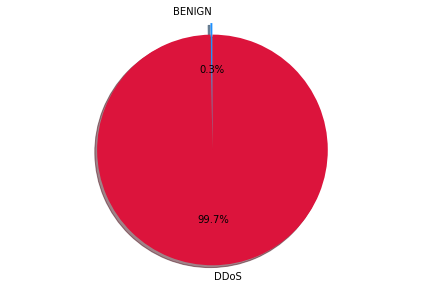

In [7]:
import matplotlib.pyplot as plt
# Pie chart
datafix = ['BENIGN','DDoS']
Label = [5124,1905191]
# only "explode" the 2nd slice (i.e. 'Hogs')
my_explode = (0, 0.1)
#add colors
colors = ['#1E90FF','#DC143C']
fig, ax = plt.subplots()
ax.pie(Label,
       explode=my_explode, 
       labels=datafix, 
       colors=colors, 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
df.drop(['Unnamed: 0.1' ],axis=1,inplace=True)

In [9]:
df.drop(['Unnamed: 0' ],axis=1,inplace=True)

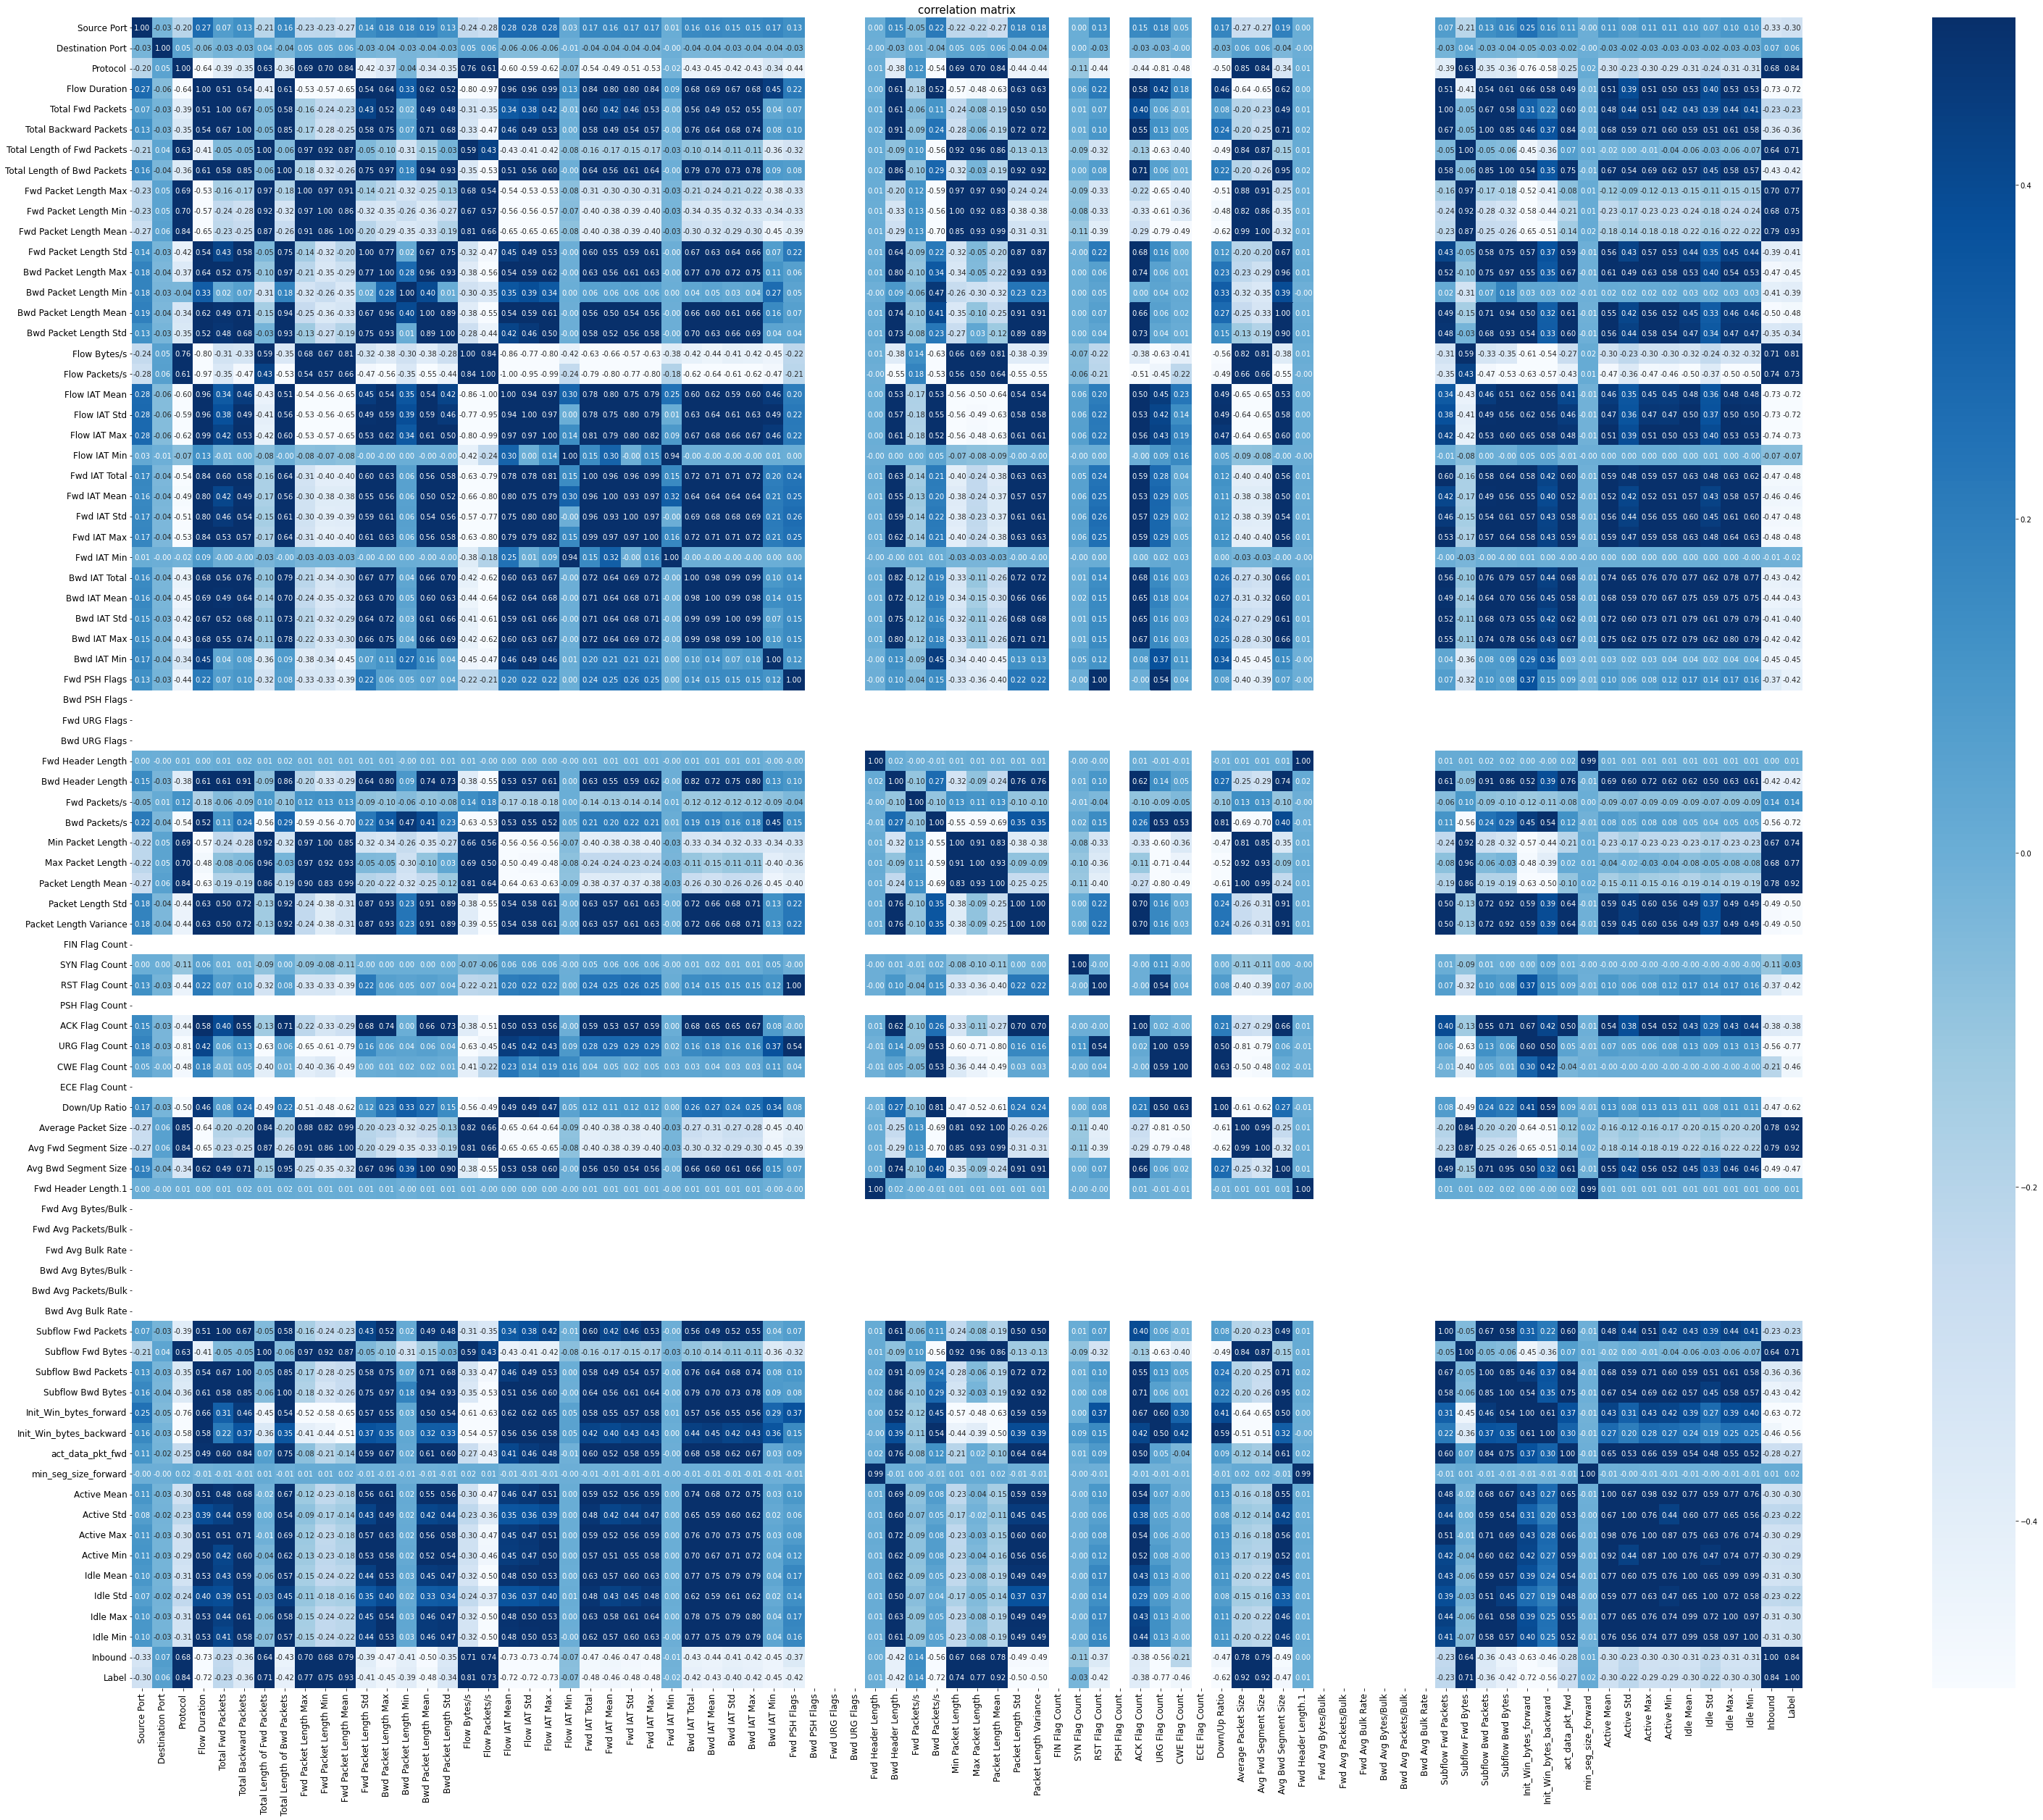

In [10]:
#visualisai data
import seaborn as sns
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(50, 35))

hm = sns.heatmap(df_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 10}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90, fontsize=12)
ax.set_yticks(ticks)
ax.set_yticklabels(df_corr.index, rotation=360, fontsize=12)

ax.set_title('correlation matrix', fontsize=15)
plt.tight_layout()
plt.savefig("heatmap2.png", dpi=500)

In [ ]:
#proses dari seleksi fitur
cor_matrix = df_corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.93)]
print(to_drop)
df = df.drop(to_drop, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


['Fwd Packet Length Max', 'Fwd Packet Length Min', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'RST Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'min_seg_size_forward', 'Active Max', 'Idle Max', 'Idle Min']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910315 entries, 0 to 1910314
Data columns (total 49 columns):
 #   Column                       Dtype
---  ------                       -----
 0   Source Port                  int64
 1   Destination Port             int64
 2   Protocol                     int64
 3   Flow Duration                int64
 4   Total Fwd Packets            int64
 5   Total Backward Packets       int64
 6   Total Length of Fwd Packets  int64
 7   Total Length of Bwd Packets  int64
 8   Fwd Packet Length Mean       int64
 9   Fwd Packet Length Std        int64
 10  Bwd Packet Length Min        int64
 11  Bwd Packet Length Std        int64
 12  Flow Bytes/s                 int64
 13  Flow IAT Min                 int64
 14  Fwd IAT Total                int64
 15  Bwd IAT Total                int64
 16  Bwd IAT Min                  int64
 17  Fwd PSH Flags                int64
 18  Bwd PSH Flags                int64
 19  Fwd URG Flags                int64
 20  Bw

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df.iloc[:, 0:47])
y = np.array(df.iloc[:, 48])

Attack=1, n=1905191 (50.000%)
Attack=0, n=1905191 (50.000%)


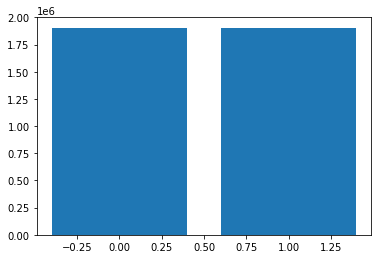

In [ ]:
#Tahap SMOTE
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from collections import Counter

#transform the dataset
oversampling = SMOTE()
X, y = oversampling.fit_resample(X, y)

#summarize distribution
counter = Counter(y)
for k, v in counter.items():
  per = v / len(X) * 100
  print('Attack=%d, n=%d (%.3f%%)' % (k, v, per))

#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

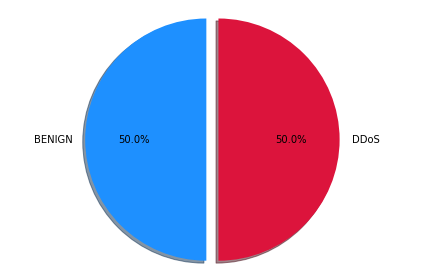

In [ ]:
import matplotlib.pyplot as plt
# Pie chart
datafix = ['BENIGN','DDoS']
Label = [1905191,1905191]
# only "explode" the 2nd slice (i.e. 'Hogs')
my_explode = (0, 0.1)
#add colors
colors = ['#1E90FF','#DC143C']
fig, ax = plt.subplots()
ax.pie(Label,
       explode=my_explode, 
       labels=datafix, 
       colors=colors, 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [ ]:
#melihat jumlah data latih
X_train.shape

(1905191, 47)

In [ ]:
#melihat jumlah data uji
X_test.shape

(1905191, 47)

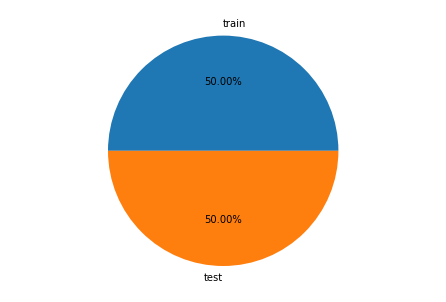

In [ ]:
#visualisai perbandingan data latih dan data uji
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = ['train','test']
Label = [1905191,1905191]
ax.pie(Label,labels=data,autopct='%1.2f%%')
plt.show()

In [ ]:
#normalisai data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1905191, 1, 47) (1905191,) (1905191, 1, 47) (1905191,)


In [ ]:
#library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, Dense

In [ ]:
#penerapan metrics
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
#Penerapan metode BRNN dan Hyperparameter
model = Sequential()
model.add(Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)))
model.add(Bidirectional(tf.keras.layers.SimpleRNN(32, return_sequences=True)))
model.add(Bidirectional(tf.keras.layers.SimpleRNN(16)))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 128)           14336     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 1, 64)            10304     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               2592      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [ ]:
#tahap training dengan hyperparameter
from tensorflow import keras
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
bilrnn_model = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test),callbacks=[csv_logger])
model.save("kddresults/bilrnn/fullmodel/bilrnn_model.hdf5")

Epoch 1/100
14885/14885 [==============================] - 138s 9ms/step - loss: 0.0317 - accuracy: 0.9941 - val_loss: 0.0042 - val_accuracy: 0.9996
Epoch 2/100
14885/14885 [==============================] - 123s 8ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 3/100
14885/14885 [==============================] - 118s 8ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 4/100
14885/14885 [==============================] - 127s 9ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 5/100
14885/14885 [==============================] - 126s 8ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 6/100
14885/14885 [==============================] - 117s 8ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 7/100
14885/14885 [==============================] - 120s 8ms/step - loss: 0.0012 - accuracy: 0.9998

In [ ]:
#cek loss dan akurasi
loss, accuracy = model.evaluate(X_test, y_test)

59538/59538 [==============================] - 145s 2ms/step - loss: 4.2891e-04 - accuracy: 0.9999


In [ ]:
#hasil loss dan akurasi
print("\nLoss: %4f, Accuracy: %.4f%%" % (loss, accuracy*100))


Loss: 0.000429, Accuracy: 99.9930%


In [ ]:
bilrnn_predict =(model.predict(X_test) > 0.5).astype("int32")

59538/59538 [==============================] - 133s 2ms/step


In [ ]:
bilrnn_predict

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
#validasi confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, bilrnn_predict)
print(cm)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

[[952425      1]
 [   133 952632]]


In [ ]:
#plot confusion matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=25)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[1]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix


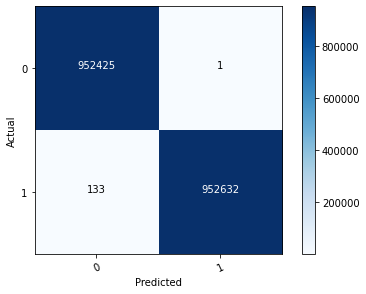

In [ ]:
#plot confusion matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(cm, classes = range(2))
plt.show()

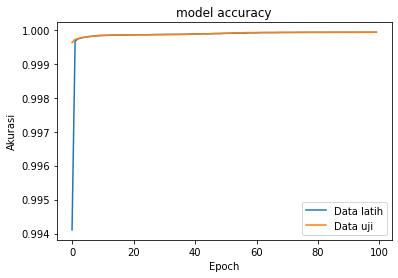

In [ ]:
#plot akurasi training dan testing
plt.plot(bilrnn_model.history['accuracy'])
plt.plot(bilrnn_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data latih', 'Data uji'], loc='lower right')
plt.show()

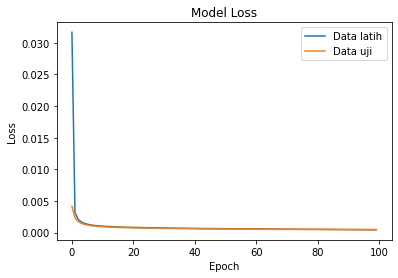

In [ ]:
#plot loss training dan testing
plt.plot(bilrnn_model.history['loss'])
plt.plot(bilrnn_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data latih', 'Data uji'], loc='upper right')
plt.show()

In [ ]:
#rumus dari presisi, recall, f1-score, akurasi, spesifitas, dan BACC
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Spesifitas = tn/(tn + fp)
BACC = (recall + Spesifitas) / 2

In [ ]:
#menghitung nilai presisi, recall, f1-score, akurasi, spesifitas, dan BACC
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("akurasi : ",akurasi)
print("spesifitas : ",Spesifitas )
print ("BACC :" ,BACC)

precesion :  0.9999989500496627
recall :  0.9998603759561098
F1 :  0.9999296582018536
akurasi :  0.9999296658445269
spesifitas :  0.9999989502778089
BACC : 0.9999296631169594


<function matplotlib.pyplot.show(*args, **kw)>

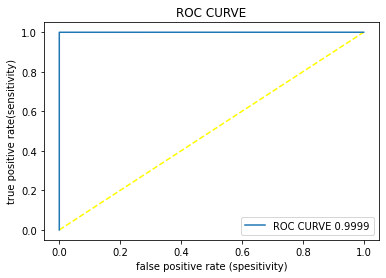

In [ ]:
#plot roc curve
import keras
import seaborn as sns
from sklearn.metrics import roc_curve, auc

fpr_keras,tpr_keras, threshold =roc_curve(y_test, bilrnn_predict)
auc=auc(fpr_keras,tpr_keras)

plt.figure(1)
plt.plot([0,1],[0,1],'k--',color='yellow')
plt.plot(fpr_keras, tpr_keras, label="ROC CURVE {0:.4f}".format(auc))
plt.xlabel('false positive rate (spesitivity)')
plt.ylabel('true positive rate(sensitivity)')
plt.title('ROC CURVE')
plt.legend(loc='best')
plt.show

In [ ]:
#menghitung nilai average precision-recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, bilrnn_predict)

print('Average precision-recall score: {0:0.8f}'.format(
      average_precision))

Average precision-recall score: 0.99992917


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99992917')

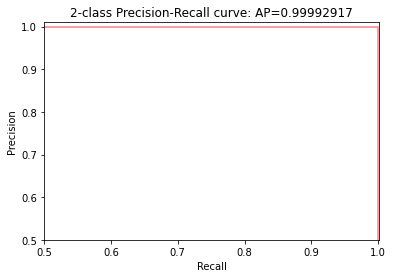

In [ ]:
#plot precision-recall curve
from inspect import signature
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, bilrnn_predict)
average_precision = average_precision_score(y_test, bilrnn_predict)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.5, where='post')
plt.fill_between(recall, precision, alpha=0.5, color='w', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.5, 1.010])
plt.xlim([0.5, 1.001])
plt.title('2-class Precision-Recall curve: AP={0:0.8f}'.format(average_precision))